# Download Dataset

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 67 Nov 12 13:03 kaggle.json


In [3]:
!cat ~/.kaggle/kaggle.json
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 4.2 MB 26.4 MB/s 
     |████████████████████████████████| 112 kB 57.2 MB/s 
     |████████████████████████████████| 147 kB 57.9 MB/s 
     |████████████████████████████████| 50 kB 5.0 MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-y26aek0g/lxml_8554d5b4a89b42f8bf17c3f658846045/setup.py'"'"'; __file__='"'"'/tmp/pip-install-y26aek0g/lxml_8554d5b4a89b42f8bf17c3f658846045/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-qu7n6nt2/install-record.txt --s

In [4]:
!kaggle competitions download -c ventilator-pressure-prediction

 91% 204M/223M [00:01<00:00, 128MB/s]
100% 223M/223M [00:01<00:00, 135MB/s]


In [5]:
!unzip ventilator-pressure-prediction.zip

Archive:  ventilator-pressure-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Import Packages

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random

# Read Dataset

In [10]:
dataset = os.path.join("")

In [11]:
train_dataset = pd.read_csv(os.path.join(dataset, "train.csv"))
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [12]:
np.unique(train_dataset['R'])

array([ 5, 20, 50])

In [13]:
test_dataset = pd.read_csv(os.path.join(dataset, "test.csv"))
test_dataset.head(n=400)

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
395,396,31,20,50,2.552009,4.977700,1
396,397,31,20,50,2.586213,4.981205,1
397,398,31,20,50,2.620192,4.984142,1
398,399,31,20,50,2.654192,4.986621,1


In [14]:
np.unique(train_dataset['breath_id'], return_counts = True)

(array([     1,      2,      3, ..., 125743, 125745, 125749]),
 array([80, 80, 80, ..., 80, 80, 80]))

In [15]:
final_dataset = train_dataset.groupby('breath_id')
final_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


In [16]:
data = train_dataset.groupby(["breath_id"])
data.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035920,6035921,125749,50,10,0.000000,6.030572,0,3.939334
6035921,6035922,125749,50,10,0.033187,25.504196,0,5.345377
6035922,6035923,125749,50,10,0.066365,21.614707,0,9.563505
6035923,6035924,125749,50,10,0.099784,16.266744,0,15.117375


# Features Engineering

In [17]:
train_dataset['u_in_after'] = data[['u_in']].shift()
train_dataset['u_out_after'] = data[['u_out']].shift()
train_dataset['u_in_back'] = data[['u_in']].shift(-1)
train_dataset['u_out_back'] = data[['u_out']].shift(-1)
train_dataset['u_in_after2'] = data[['u_in']].shift(2)
train_dataset['u_out_after2'] = data[['u_out']].shift(2)
train_dataset['u_in_back2'] = data[['u_in']].shift(-2)
train_dataset['u_out_back2'] = data[['u_out']].shift(-2)
train_dataset['u_in_after3'] = data[['u_in']].shift(3)
train_dataset['u_out_after3'] = data[['u_out']].shift(3)
train_dataset['u_in_back3'] = data[['u_in']].shift(-3)
train_dataset['u_out_back3'] = data[['u_out']].shift(-3)
train_dataset['u_in_after4'] = data[['u_in']].shift(4)
train_dataset['u_out_after4'] = data[['u_out']].shift(4)
train_dataset['u_in_back4'] = data[['u_in']].shift(-4)
train_dataset['u_out_back4'] = data[['u_out']].shift(-4)
train_dataset['u_in_after5'] = data[['u_in']].shift(5)
train_dataset['u_out_after5'] = data[['u_out']].shift(5)
train_dataset['u_in_back5'] = data[['u_in']].shift(-5)
train_dataset['u_out_back5'] = data[['u_out']].shift(-5)

In [18]:
train_dataset['u_in_max'] = data[['u_in']].transform(lambda x: x.max() - x)
train_dataset['u_in_min'] = data[['u_in']].transform(lambda x: x - x.min())

In [19]:
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,u_in_after,u_out_after,...,u_in_after4,u_out_after4,u_in_back4,u_out_back4,u_in_after5,u_out_after5,u_in_back5,u_out_back5,u_in_max,u_in_min
0,1,1,20,50,0.000000,0.083334,0,5.837492,NaN,NaN,...,NaN,NaN,25.355850,0.0,NaN,NaN,27.259866,0.0,28.229702,0.083334
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.083334,0.0,...,NaN,NaN,27.259866,0.0,NaN,NaN,27.127486,0.0,9.929994,18.383041
2,3,1,20,50,0.067514,22.509278,0,7.876254,18.383041,0.0,...,NaN,NaN,27.127486,0.0,NaN,NaN,26.807732,0.0,5.803758,22.509278
3,4,1,20,50,0.101542,22.808822,0,11.742872,22.509278,0.0,...,NaN,NaN,26.807732,0.0,NaN,NaN,27.864715,0.0,5.504214,22.808822
4,5,1,20,50,0.135756,25.355850,0,12.234987,22.808822,0.0,...,0.083334,0.0,27.864715,0.0,NaN,NaN,28.313036,0.0,2.957185,25.355850


In [20]:
train_dataset.fillna(0, inplace = True)

In [21]:
train_dataset.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,u_in_after,u_out_after,...,u_in_after4,u_out_after4,u_in_back4,u_out_back4,u_in_after5,u_out_after5,u_in_back5,u_out_back5,u_in_max,u_in_min
0,1,1,20,50,0.000000,0.083334,0,5.837492,0.000000,0.0,...,0.000000,0.0,25.355850,0.0,0.0,0.0,27.259866,0.0,28.229702,0.083334
1,2,1,20,50,0.033652,18.383041,0,5.907794,0.083334,0.0,...,0.000000,0.0,27.259866,0.0,0.0,0.0,27.127486,0.0,9.929994,18.383041
2,3,1,20,50,0.067514,22.509278,0,7.876254,18.383041,0.0,...,0.000000,0.0,27.127486,0.0,0.0,0.0,26.807732,0.0,5.803758,22.509278
3,4,1,20,50,0.101542,22.808822,0,11.742872,22.509278,0.0,...,0.000000,0.0,26.807732,0.0,0.0,0.0,27.864715,0.0,5.504214,22.808822
4,5,1,20,50,0.135756,25.355850,0,12.234987,22.808822,0.0,...,0.083334,0.0,27.864715,0.0,0.0,0.0,28.313036,0.0,2.957185,25.355850


In [22]:
features = train_dataset.drop(['pressure', 'id', 'breath_id'], axis = 1)
target = train_dataset['pressure']

In [23]:
features.head()

,R,C,time_step,u_in,u_out,u_in_after,u_out_after,u_in_back,u_out_back,u_in_after2,...,u_in_after4,u_out_after4,u_in_back4,u_out_back4,u_in_after5,u_out_after5,u_in_back5,u_out_back5,u_in_max,u_in_min
0,20,50,0.000000,0.083334,0,0.000000,0.0,18.383041,0.0,0.000000,...,0.000000,0.0,25.355850,0.0,0.0,0.0,27.259866,0.0,28.229702,0.083334
1,20,50,0.033652,18.383041,0,0.083334,0.0,22.509278,0.0,0.000000,...,0.000000,0.0,27.259866,0.0,0.0,0.0,27.127486,0.0,9.929994,18.383041
2,20,50,0.067514,22.509278,0,18.383041,0.0,22.808822,0.0,0.083334,...,0.000000,0.0,27.127486,0.0,0.0,0.0,26.807732,0.0,5.803758,22.509278
3,20,50,0.101542,22.808822,0,22.509278,0.0,25.355850,0.0,18.383041,...,0.000000,0.0,26.807732,0.0,0.0,0.0,27.864715,0.0,5.504214,22.808822
4,20,50,0.135756,25.355850,0,22.808822,0.0,27.259866,0.0,22.509278,...,0.083334,0.0,27.864715,0.0,0.0,0.0,28.313036,0.0,2.957185,25.355850


In [24]:
features = np.array(features)
features.shape

(6036000, 27)

In [25]:
features = features.reshape(int(features.shape[0]/80), 80, features.shape[1])
features.shape

(75450, 80, 27)

In [26]:
target = np.array(target)
target.shape

(6036000,)

In [27]:
target = target.reshape(75450, 80)
target.shape

(75450, 80)

# Deep Learning Model

In [28]:
norm = tf.keras.layers.Normalization(input_shape = [80, features.shape[2],], axis = -1)
norm.adapt(features)

In [29]:
m = tf.keras.Sequential([
    norm,
    tf.keras.layers.Conv1D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv1D(256, 3, activation = "relu"),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(80,)
])
m.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "mae")

In [30]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 80, 27)           55        
 n)                                                              
                                                                 
 conv1d (Conv1D)             (None, 78, 128)           10496     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 39, 128)          0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 256)           98560     
                                                        

# Training Model

In [31]:
history = m.fit(features, target, validation_split = 0.2, epochs = 3500, batch_size = 512,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 260, 
                                                              monitor = 'val_loss', 
                                                              mode = 'min', 
                                                              restore_best_weights=True)])

Streaming output truncated to the last 5000 lines.
118/118 [==============================] - 3s 22ms/step - loss: 0.7660 - val_loss: 0.5135
Epoch 309/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7676 - val_loss: 0.5164
Epoch 310/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7664 - val_loss: 0.5216
Epoch 311/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7659 - val_loss: 0.5161
Epoch 312/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7634 - val_loss: 0.5124
Epoch 313/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7651 - val_loss: 0.5197
Epoch 314/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7639 - val_loss: 0.5196
Epoch 315/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7640 - val_loss: 0.5318
Epoch 316/3500
118/118 [==============================] - 3s 22ms/step - loss: 0.7618 - val_loss: 0.5197
Epoch 317/3500
118/

# Results:

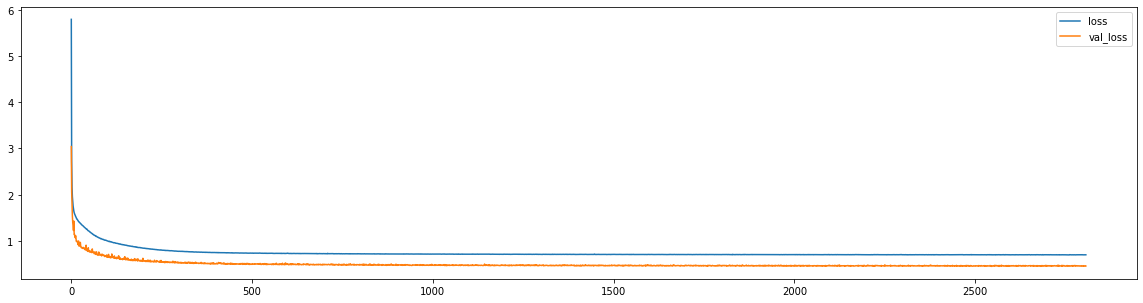

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()

In [33]:
m.evaluate(features, target)

2358/2358 [==============================] - 7s 3ms/step - loss: 0.4078


0.4078189432621002

In [39]:
y_pred = m.predict(features, batch_size = 512)

148/148 [==============================] - 2s 9ms/step


In [87]:
target[0]

array([ 5.83749171,  5.90779385,  7.87625392, 11.74287192, 12.23498694,
       12.86770625, 14.69556203, 15.8906985 , 15.53918778, 15.75009421,
       17.29674141, 17.22643927, 16.17190709, 17.36704356, 18.07006501,
       17.15613712, 18.28097145, 18.77308647, 17.85915858, 19.1245972 ,
       19.33550363, 18.49187789, 18.56218003, 18.63248218, 18.84338861,
       19.05429505, 19.26520149, 19.33550363, 19.33550363, 19.47610792,
       19.54641007, 17.01553283,  9.56350541,  7.87625392,  8.64957752,
        7.59504534,  7.66534749,  8.2980668 ,  7.24353461,  7.94655607,
        7.59504534,  7.45444105,  8.1574625 ,  6.82172174,  7.17323247,
        7.5247432 ,  6.96232603,  7.45444105,  7.59504534,  7.17323247,
        7.73564963,  7.24353461,  7.59504534,  7.3841389 ,  7.24353461,
        7.73564963,  7.5247432 ,  6.96232603,  7.10293032,  7.31383676,
        6.11870029,  7.03262818,  6.82172174,  6.54051316,  6.96232603,
        6.82172174,  6.54051316,  6.82172174,  6.82172174,  6.39

In [88]:
y_pred[0]

array([ 6.082313 ,  5.983269 ,  8.110636 , 11.283112 , 12.510807 ,
       13.164204 , 14.464811 , 15.454739 , 15.795632 , 16.062464 ,
       16.52952  , 16.7527   , 17.017117 , 17.242617 , 17.554409 ,
       17.720448 , 17.898165 , 18.101683 , 18.34552  , 18.488722 ,
       18.64926  , 18.77447  , 18.800842 , 18.957357 , 19.125572 ,
       19.177914 , 19.281733 , 19.46057  , 19.632128 , 19.75014  ,
       19.322094 , 16.626871 , 10.029117 ,  8.558365 ,  8.082582 ,
        7.8928843,  7.831299 ,  7.7334614,  7.6773314,  7.5612106,
        7.516695 ,  7.412856 ,  7.3156915,  7.2427588,  7.1445665,
        7.1334906,  7.1114483,  7.069296 ,  7.147809 ,  7.185407 ,
        7.2857356,  7.3142376,  7.194307 ,  7.1634893,  7.0943394,
        7.165249 ,  7.1307983,  6.9076576,  7.1632814,  6.9937286,
        6.8302536,  6.8092747,  6.808266 ,  6.7028284,  6.606332 ,
        6.7290206,  6.6267676,  6.577271 ,  6.571465 ,  6.492866 ,
        6.481183 ,  6.477959 ,  6.4397426,  6.4354463,  6.4213

In [71]:
def draw_result(start, end, target, y_pred):
  plt.figure(figsize = (20, 7))
  plt.plot(np.reshape(target[start:end], -1), linewidth=5, label = "actual Pressure values")
  plt.plot(np.reshape(y_pred[start:end], -1), linewidth=2, label = "predict Pressure values")
  plt.legend()

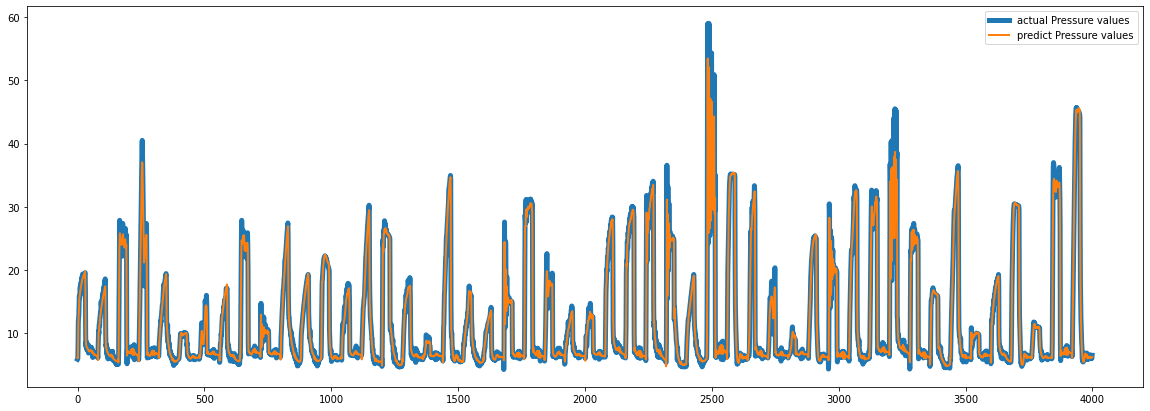

In [72]:
draw_result(0, 50, target, y_pred)

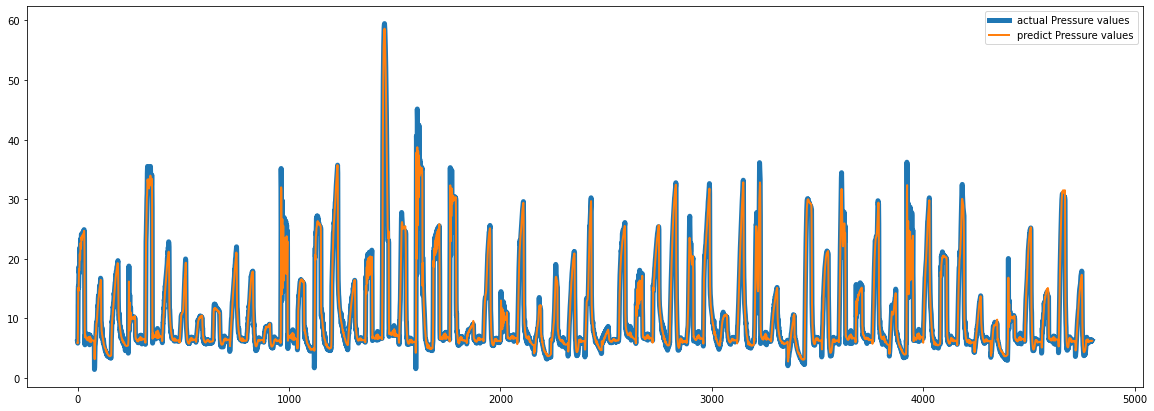

In [73]:
draw_result(50, 110, target, y_pred)

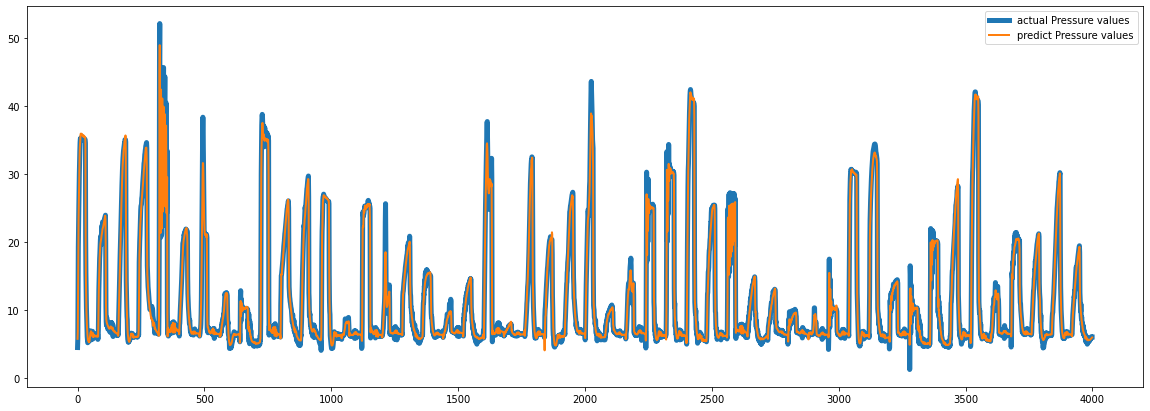

In [74]:
draw_result(110, 160, target, y_pred)

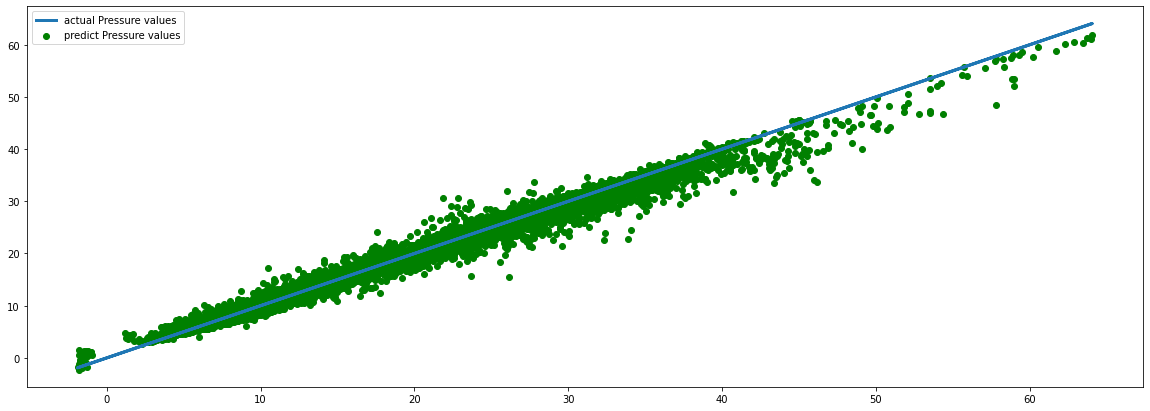

In [86]:
plt.figure(figsize = (20, 7))
plt.plot(np.reshape(target[:500], -1), np.reshape(target[:500], -1), linewidth=3, label = "actual Pressure values")
plt.scatter(np.reshape(target[:500], -1), np.reshape(y_pred[:500], -1), c = 'g', label = "predict Pressure values")
plt.legend()

In [92]:
def create_table(target, y_pred):
  target = np.reshape(target, -1)
  y_pred = np.reshape(y_pred, -1)
  return pd.DataFrame({
      "actual Pressure values": target,
      "predict Pressure values": y_pred,
      "diff": np.abs(target - y_pred)
  })

In [93]:
create_table(target, y_pred).head(40)

,actual Pressure values,predict Pressure values,diff
0,5.837492,6.082313,0.244821
1,5.907794,5.983269,0.075475
2,7.876254,8.110636,0.234382
3,11.742872,11.283112,0.459760
4,12.234987,12.510807,0.275820
5,12.867706,13.164204,0.296497
6,14.695562,14.464811,0.230751
7,15.890699,15.454739,0.435960
8,15.539188,15.795632,0.256445
9,15.750094,16.062464,0.312370


In [53]:
m.save("Ventilator_Pressure_Prediction.h5")